In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv("income.csv")

In [ ]:
data.shape

(31978, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
#Outlier Detection
#Drop Outliers
#1. Based on Box Plot
# filter the numeric variables from the data
data_num = data.select_dtypes(include = np.number)
data_num

,age,capitalgain,capitalloss,hoursperweek
0,45,0,0,28
1,24,0,0,40
2,44,0,0,40
3,27,0,0,40
4,20,0,0,35
...,...,...,...,...
31973,34,594,0,60
31974,34,0,0,40
31975,23,0,0,40
31976,42,0,0,40


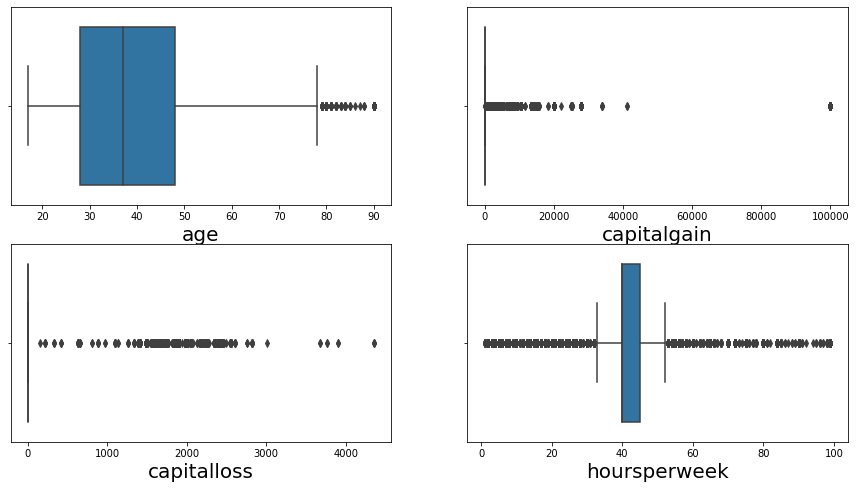

In [ ]:
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: set the font size of the x-axis label


for variable, subplot in zip(data_num.columns, ax.flatten()):
    z = sns.boxplot(x = data_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20) 

In [ ]:
#Based on IQR
#The IQR method can be used when the data distribution is non-normal. 
#Also the quartiles are less affected by the extreme values.
# obtain the first quartile
Q1 = data_num.quantile(0.25)

# obtain the third quartile
Q3 = data_num.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

age             20.0
capitalgain      0.0
capitalloss      0.0
hoursperweek     5.0
dtype: float64


In [ ]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (0 for 'index')
data_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


In [ ]:
data_iqr.shape

(20029, 13)

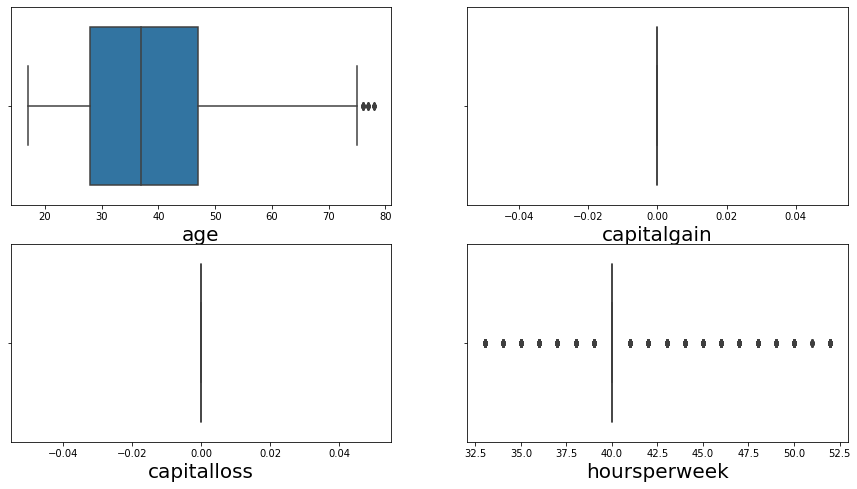

In [ ]:
#confirm whether the outliers are removed or not.
data_num = data_iqr.select_dtypes(include = np.number)
data_num
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for variable, subplot in zip(data_num.columns, ax.flatten()):
    z = sns.boxplot(x = data_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)

In [ ]:
#Based on Z-score
#This method has a disadvantage that the values of mean and standard deviation are 
#highly affected by the presence of outliers.
# import library scipy
import scipy
# from scipy import the module stats
from scipy import stats

# z-scores are defined for each observation in a variable
# compute the z-scores using the method zscore from the scipy library 
z_scores_age = scipy.stats.zscore(data_num["age"])

# display the z-scores
z_scores_age

array([-1.16421445,  0.47934863, -0.91767999, ..., -1.24639261,
        0.31499232, -0.75332368])

In [ ]:
# print the rows where z-score is less than -3
row_index_less = np.where(z_scores_age < -3)

# print the rows where z-score is more than 3
row_index_more = np.where(z_scores_age > 3)

#The rows corresponding to the above index are the outliers for the data.

# count of outliers in the variable representing profit
len(row_index_less[0]) + len(row_index_more[0])

33

In [ ]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
data_age_zscore = data_num["age"][~(( z_scores_age < -3) |(z_scores_age > 3))]

In [ ]:
#Check the shape of the data
data_age_zscore.shape

(19996,)

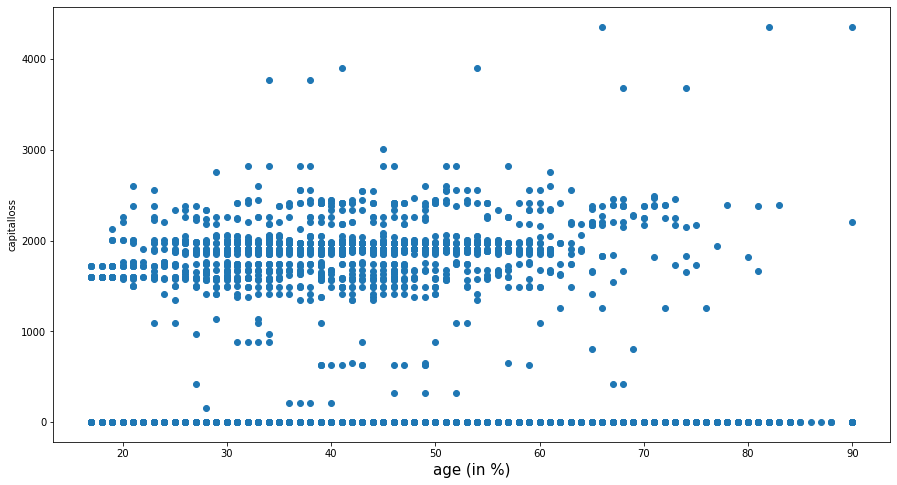

In [ ]:
#Based on Scatter Plots
# initialize the figure 
# figsize: set the plot size
fig, ax = plt.subplots(figsize=(15,8))

# plot the scatter plot
ax.scatter(data["age"], data["capitalloss"])

# set the x-axis label
# fontsize: set the font size of the label
ax.set_xlabel("age (in %)", fontsize = 15)

# set the y-axis label
# fontsize: set the font size of the label
ax.set_ylabel('capitalloss')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


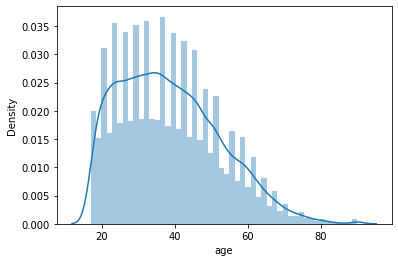

In [ ]:
#How to treat outliers
#1. Log Transformations
#Before log transformation (age feature)
sns.distplot(data_num['age'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


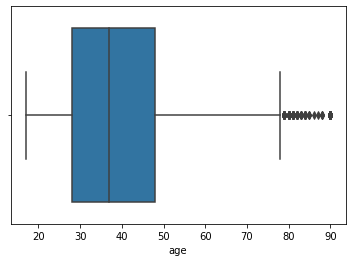

In [ ]:
sns.boxplot(data_num['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


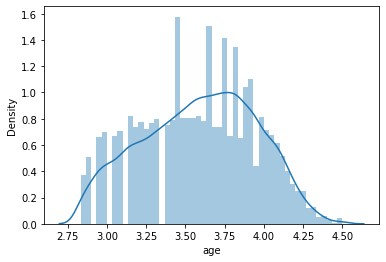

<Figure size 432x288 with 0 Axes>

In [ ]:
#Log transformation helps reducing skewness when you have skewed data.

#After Log Transformations (age)
age_log= np.log(data_num['age'])
sns.distplot(age_log)

fig = plt.figure()


In [ ]:
# Quantile based flooring and capping
# Finding upper and lower limit
upper_limit = data_num['age'].quantile(0.99)
lower_limit = data_num['age'].quantile(0.01)

In [ ]:
#Apply Capping and flooring
data_num['age'] = np.where(data_num['age'] >= upper_limit,
        upper_limit,
        np.where(data_num['age'] <= lower_limit,
        lower_limit,
        data_num['age']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


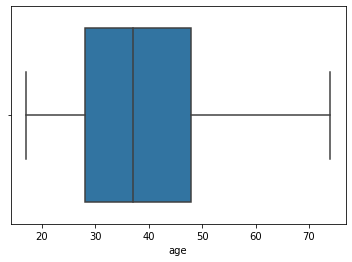

In [ ]:
sns.boxplot(data_num['age'])